In [1]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

### What dataset will we be using?
We will be working with a dataset talking about wind turbines. Wind power is an abundant form of renewable energy that helps to avoid 329 million metric tons of CO2 emissions every year.
<br></br>
Wind turbines harness the power of wind to generate electricity, using mechanical power to spin a generator. Turbines are particularly effective because they can provide electricity without burning any fuel or polluting the air. Offshore and onshore wind farms are becoming increasingly common around the world. The London Array in the United Kingdom is one such example, featuring 175 wind turbines that generate enough energy to power nearly half a million homes.
<br></br>
This dataset could be useful if we wish to learn more about the distribution of various specs about wind turbines. For example, we can learn where the majority of wind turbines are located (within the United States), how much electricity they generate (kilo or mega watts), the geographical coordinates of the turbines, and more!
<br></br>
If you would like to access this dataset from the source, you can find it here: https://corgis-edu.github.io/corgis/csv/wind_turbines/. Additionally, it can also tell you more information about what each column means, as some datasets can contain very misinformative column names!|

In [2]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/wind_turbines.csv')
data.head() # print out only the first few rows, for easy viewing.

Site.State    Site.County  Year  Turbine.Capacity  Turbine.Hub_Height  \
0         IA   Story County  2017              3000                87.5   
1         IA  Hardin County  2017              3000                87.5   
2         IA   Story County  2017              3000                87.5   
3         IA   Story County  2017              3000                87.5   
4         IA   Story County  2017              3000                87.5   

   Turbine.Rotor_Diameter  Turbine.Swept_Area  Turbine.Total_Height  \
0                   125.0            12271.85                 150.0   
1                   125.0            12271.85                 150.0   
2                   125.0            12271.85                 150.0   
3                   125.0            12271.85                 150.0   
4                   125.0            12271.85                 150.0   

   Project.Capacity  Project.Number_Turbines  Site.Latitude  Site.Longitude  
0              30.0                       10     -93.518082       42.013630  
1              30.0                       10     -93.367798       42.497940  
2              30.0                       10     -93.513710       42.019119  
3              30.0                       10     -93.523651       42.006813  
4              30.0                       10     -93.632835       41.882477

**For this regression exercise, let's say I want to try and predict turbine capacity, based on the state where the turbine is located, it's hub height, rotor diameter, sweeping area, total height, and year that the turbine became operational.** 

<br> This means Turbine.Capacity is our target variable, and the following are our features: Site.State, Year, Turbine.Hub_Height, Turbine.Rotor_Diameter, Turbine.Swept_Area, and Turbine.Total_Height.
Note that our target variable is a numercial value, and as for our features has 1 string (state), and the remaining 5 are numerical values. 
<br>
Let's extract only the columns we need to perform regression using the following code:

In [3]:
data = data[["Site.State", "Year", "Turbine.Hub_Height", "Turbine.Rotor_Diameter", "Turbine.Swept_Area" , "Turbine.Total_Height", "Turbine.Capacity"]]
print(data.head())

  Site.State  Year  Turbine.Hub_Height  Turbine.Rotor_Diameter  \
0         IA  2017                87.5                   125.0   
1         IA  2017                87.5                   125.0   
2         IA  2017                87.5                   125.0   
3         IA  2017                87.5                   125.0   
4         IA  2017                87.5                   125.0   

   Turbine.Swept_Area  Turbine.Total_Height  Turbine.Capacity  
0            12271.85                 150.0              3000  
1            12271.85                 150.0              3000  
2            12271.85                 150.0              3000  
3            12271.85                 150.0              3000  
4            12271.85                 150.0              3000  


### We need to Convert Categorical Data to Dummy Values

More specifically, the cateogircal column we need to convert is the Site.State column. This step is classified under one hot encoding, however since we specified ```drop_first=True```, the first column will be dropped. This implies that if for a particular row, all the columns have 0, then that row would be the implied value (that's not included as a column). 

In [4]:
transmission = pd.get_dummies(data['Site.State'], drop_first=True)
transmission

AZ  CA  CO  CT  DE  GU  HI  IA  ID  IL  ...  SD  TN  TX  UT  VA  VT  \
0       0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
4       0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
63956   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
63957   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
63958   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
63959   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
63960   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       WA  WI  WV  WY  
0       0   0   0   0  
1       0   0   0   0  
2       0   0   0   0  
3       0   0   0   0  
4       0   0   0   0  
...    ..  ..  ..  ..  
63956   0   0   0   0  
63957   0   0   0   0  
63958   0   0   0   0  
63959   0   0   0   0  
63960   0   0   0   0  

[63961 rows x 43 columns]

In [5]:
# s1 = pd.Series(['a', 'b', 'c'])

# ans = pd.get_dummies(s1, drop_first=True)
# ans

In [6]:
# s1 = pd.Series(['a', 'b', 'c'])

# ans = pd.get_dummies(s1)
# ans

In [7]:
data.drop(columns=["Site.State"] , inplace=True)
data = data.join(transmission)
data.head()

Year  Turbine.Hub_Height  Turbine.Rotor_Diameter  Turbine.Swept_Area  \
0  2017                87.5                   125.0            12271.85   
1  2017                87.5                   125.0            12271.85   
2  2017                87.5                   125.0            12271.85   
3  2017                87.5                   125.0            12271.85   
4  2017                87.5                   125.0            12271.85   

   Turbine.Total_Height  Turbine.Capacity  AZ  CA  CO  CT  ...  SD  TN  TX  \
0                 150.0              3000   0   0   0   0  ...   0   0   0   
1                 150.0              3000   0   0   0   0  ...   0   0   0   
2                 150.0              3000   0   0   0   0  ...   0   0   0   
3                 150.0              3000   0   0   0   0  ...   0   0   0   
4                 150.0              3000   0   0   0   0  ...   0   0   0   

   UT  VA  VT  WA  WI  WV  WY  
0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0  

[5 rows x 49 columns]

In this step, we will be splitting the data into a training and testing set, with a 70% and 30% split, respectively. The training set will be used to build our regression model. It's important that we keep this model isolated from the testing set, because we don't want our model to also be influenced by the testing set.

Rather, we want to ensure that once our model has been completed, it can get fresh and unseen data as its input. Only through this way can we truly test how good our model fits to data that it's never seen before. If we leaked our test data into building the model, we would be violating machine learning's golden rule and that will result in misleading results.


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Turbine.Capacity"]) # We are taking our explanatory variables, or features
y = data["Turbine.Capacity"] # Taking the response or target variable only.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Aforementioned 70%-30% split

X_train_rotorDiameter = X_train["Turbine.Rotor_Diameter"].to_numpy().reshape(-1,1)
X_test_rotorDiameter = X_test["Turbine.Rotor_Diameter"].to_numpy().reshape(-1,1)


# X_train = X_train.to_numpy() # Transform our data into numpy, for analysis steps that will become evident later
# X_test = X_test.to_numpy() # The workflow is that we change any Series into an NumPy array, then reshape it to have 2 dimensions. 
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()



### Example 1: Univariate Linear Regression
For our first model, we will just be using one variable, which is rotor diameter. We wish to predict the target, turbine capacity.

In [9]:
# Rotor diameter of turbine is the third column, but when selecting individual columns it's 0-indexed, therefore we type 2 

# X_train_rotorDiameter = X_train[:,2].reshape(-1,1) # Some functions only work when we have 2-dimensional table. 
# X_test_rotorDiameter = X_test[:,2].reshape(-1,1)


X_train_rotorDiameter

array([[ 77.],
       [100.],
       [101.],
       ...,
       [103.],
       [136.],
       [120.]])

In [10]:
# print(X_train[:,2].reshape(-1,1))
# print(X_train[:,2])

In [11]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

train_plot = figure(title='Training Data', x_axis_label='Rotor Diameter', y_axis_label='Turbine Capacity')
train_plot.circle(x=X_train_rotorDiameter.ravel(), y=y_train, color='blue')
show(train_plot)

Loading BokehJS ...

In [12]:
# This code cell performs the training step. We are taking our rotor diameter (X) training data and fitting that with the target training data.

print(type(X_train_rotorDiameter))


from sklearn import linear_model

my_linear_model = linear_model.LinearRegression()
my_linear_model.fit(X_train_rotorDiameter, y_train)

<class 'numpy.ndarray'>


LinearRegression()

The line of code below tells us our parameters for our univariate linear regression model. It follows a simple formula of $ y=mx+b $.

In [13]:
print(my_linear_model.coef_)
print(my_linear_model.intercept_)

[26.0241738]
-518.0005799328476


From the above values, we can interpret our univariate polynomial regression as $f(x) = -518.00 + 26.02x $

In [14]:
train_predictions_linear = my_linear_model.predict(X_train_rotorDiameter)
test_predictions_linear = my_linear_model.predict(X_test_rotorDiameter)

train_predictions_linear


array([1485.8608028 , 2084.41680024, 2110.44097404, ..., 2162.48932164,
       3021.2870571 , 2604.90027627])

In [15]:
from bokeh.layouts import row

def visualize_model(X_train, X_test, train_preds, test_preds):
    train_plot_cubic = figure(title='Train Data', x_axis_label='Rotor Diameter', y_axis_label='Turbine Capacity')
    test_plot_cubic = figure(title='Test Data', x_axis_label='Rotor Diameter', y_axis_label='Turbine Capacity')

    train_plot_cubic.circle(x=X_train.ravel(), y=y_train, color='blue', legend_label='Actual')
    train_plot_cubic.circle(x=X_train.ravel(), y=train_preds, color='red', legend_label='Predicted')

    test_plot_cubic.circle(x=X_test.ravel(), y=y_test, color='blue', legend_label='Actual')
    test_plot_cubic.circle(x=X_test.ravel(), y=test_preds, color='red', legend_label='Predicted')
    print('X train size:' , len(X_train))
    print('X test size:' , len(X_test))
    print('train_preds size:' , len(train_preds))
    print('test_preds size:' , len(test_preds))
    
    show(row(train_plot_cubic,test_plot_cubic))

visualize_model(X_train_rotorDiameter, X_test_rotorDiameter, train_predictions_linear, test_predictions_linear)

print('Train Data R-squared: ' + str(my_linear_model.score(X_train_rotorDiameter,y_train)))
print('Test Data R-squred: ' + str(my_linear_model.score(X_test_rotorDiameter,y_test)))

X train size: 44772
X test size: 19189
train_preds size: 44772
test_preds size: 19189


Train Data R-squared: 0.779974874064987
Test Data R-squred: 0.7786954152847393


### Example 2: Univariate Polynomial Regression

After examining our model, it might be feasible to test how well a quadratic curve fits onto our data. 
Our univariate polynomial regression model (which in our case is degree 2) takes the form $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $ for constants $\theta_0, \theta_1, \theta_2 $, where $x$ is the `rotor diameter` variable and $f(x)$ is the predicted turbine capacity.

Note that $\theta_0$ is referred to as the *bias term*, or the *intercept term*. It is not affected by the input variable, and its purpose is to allow the algorithm to find the y-intercept of the model.

In [16]:
from sklearn.preprocessing import PolynomialFeatures


quadratic = PolynomialFeatures(degree=2, include_bias=False) # We are defining the polynomial regression model to be of degree 2
X_train_mileage_quadratic = quadratic.fit_transform(X_train_rotorDiameter) # Tansforming x (rotor diameter) into x^1, x^2
X_test_mileage_quadratic = quadratic.fit_transform(X_test_rotorDiameter)

print('X_train_rotorDiameter_quadratic \n' + str(X_train_mileage_quadratic[:4,:]))

X_train_rotorDiameter_quadratic 
[[   77.  5929.]
 [  100. 10000.]
 [  101. 10201.]
 [   88.  7744.]]


In [17]:
quadratic_model = linear_model.LinearRegression()
quadratic_model.fit(X_train_mileage_quadratic, y_train)

LinearRegression()

In [18]:
print(quadratic_model.coef_)
print(quadratic_model.intercept_)

[14.74672078  0.06493485]
-68.11896155871091


From the above values, we can interpret our univariate polynomial regression as $f(x) = -70.57 + 14.79x + 0.065x^2 $

In [20]:
train_predictions_quadratic = quadratic_model.predict(X_train_mileage_quadratic)
test_predictions_quadratic = quadratic_model.predict(X_test_mileage_quadratic)

In [21]:
visualize_model(X_train_rotorDiameter, X_test_rotorDiameter, train_predictions_quadratic, test_predictions_quadratic)
print('Train Data R-squared: ' + str(quadratic_model.score(X_train_mileage_quadratic,y_train)))
print('Test Data R-squared: ' + str(quadratic_model.score(X_test_mileage_quadratic,y_test)))

X train size: 44772
X test size: 19189
train_preds size: 44772
test_preds size: 19189


Train Data R-squared: 0.7868924249981496
Test Data R-squared: 0.7844308506526276


### Principle Component Analysis (PCA)

Principal Component Analysis (PCA) reduces the dimensionality of multiple numeric features into a smaller set of components that retain the essential information from the original data. This facilitates visualizing the data and gaining insight into which function would be most suitable to apply.

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.iloc[:,0:5]
X_test_numeric = X_test.iloc[:, 0:5]

scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.fit_transform(X_test_numeric)

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_numeric)

train_plot_pca = figure(title='Principal Component Analysis', x_axis_label='Principal Component', y_axis_label='price')
train_plot_pca.circle(x=X_train_pca[:,0], y=y_train, color='blue')
show(train_plot_pca)

### Example 3: Multivariate Polynomial Regression

For our final model, we can use all of our predictor variables, both numerical and dummy. More specifically, we can use year, hub height, rotor diameter, swept area, and total height as our numerical predictors. The dummy variables here would be all of the states. We are using all of these numeric and dummy variables to predict the output variable, turbine capacity.  

The first model is a quadratic one. That means it takes the form $f(x) = ax^2 + bx + c $ for constants $a, b, c$. This time however, every variable is used as input, and not just the rotor diameter.

In [34]:
X_train_cubic = quadratic.fit_transform(X_train_numeric)
X_test_cubic = quadratic.fit_transform(X_test_numeric)

data

Year  Turbine.Hub_Height  Turbine.Rotor_Diameter  Turbine.Swept_Area  \
0      2017                87.5                   125.0            12271.85   
1      2017                87.5                   125.0            12271.85   
2      2017                87.5                   125.0            12271.85   
3      2017                87.5                   125.0            12271.85   
4      2017                87.5                   125.0            12271.85   
...     ...                 ...                     ...                 ...   
63956  2015                80.0                   100.0             7853.98   
63957  2015                80.0                   100.0             7853.98   
63958  2016                37.0                    21.0              346.36   
63959  2003                30.5                    15.0              176.71   
63960  2003                30.5                    15.0              176.71   

       Turbine.Total_Height  Turbine.Capacity  AZ  CA  CO  CT  ...  SD  TN  \
0                     150.0              3000   0   0   0   0  ...   0   0   
1                     150.0              3000   0   0   0   0  ...   0   0   
2                     150.0              3000   0   0   0   0  ...   0   0   
3                     150.0              3000   0   0   0   0  ...   0   0   
4                     150.0              3000   0   0   0   0  ...   0   0   
...                     ...               ...  ..  ..  ..  ..  ...  ..  ..   
63956                 130.1              1700   0   0   0   0  ...   0   0   
63957                 130.1              1700   0   0   0   0  ...   0   0   
63958                  47.5               100   0   0   0   0  ...   0   0   
63959                  38.0                65   0   0   0   0  ...   0   0   
63960                  38.0                65   0   0   0   0  ...   0   0   

       TX  UT  VA  VT  WA  WI  WV  WY  
0       0   0   0   0   0   0   0   0  
1       0   0   0   0   0   0   0   0  
2       0   0   0   0   0   0   0   0  
3       0   0   0   0   0   0   0   0  
4       0   0   0   0   0   0   0   0  
...    ..  ..  ..  ..  ..  ..  ..  ..  
63956   1   0   0   0   0   0   0   0  
63957   1   0   0   0   0   0   0   0  
63958   0   0   0   0   0   0   0   0  
63959   0   0   0   0   0   0   0   0  
63960   0   0   0   0   0   0   0   0  

[63961 rows x 49 columns]

In [35]:
X_train.iloc[:,5:]

AZ  CA  CO  CT  DE  GU  HI  IA  ID  IL  ...  SD  TN  TX  UT  VA  VT  \
8049    0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
48539   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
43003   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
43400   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
724     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
62570   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
38158   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
860     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
15795   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
56422   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

       WA  WI  WV  WY  
8049    0   0   0   0  
48539   0   0   0   0  
43003   0   0   0   0  
43400   0   0   0   0  
724     0   0   0   0  
...    ..  ..  ..  ..  
62570   1   0   0   0  
38158   0   0   1   0  
860     0   0   0   0  
15795   0   0   0   0  
56422   0   0   0   0  

[44772 rows x 43 columns]

In [36]:
X_train_cubic_scaled = scaler.fit_transform(X_train_cubic)
X_test_cubic_scaled = scaler.fit_transform(X_test_cubic)

X_train_nominal = X_train.iloc[:,5:]
X_test_nominal = X_test.iloc[:,5:]

X_train_cubic_full = np.hstack([X_train_cubic_scaled, X_train_nominal])
X_test_cubic_full = np.hstack([X_test_cubic_scaled, X_test_nominal])

print("X_train_cubic_full \n" + str(X_train_cubic_full[:2,:]))

X_train_cubic_full 
[[-0.74519855 -0.02560248 -0.75607647 -0.86249789 -0.39738044 -0.74735493
  -0.04287289 -0.75980057 -0.86358487 -0.40776846 -0.11628886 -0.64338781
  -0.79389192 -0.34747335 -0.86253756 -0.87451041 -0.74685496 -0.83650069
  -0.83147904 -0.53055481  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.03386523  1.58050997  0.22459078  0.11413316  0.97173679  0.03233457
   1.56153262  0.22020004  0.11103194  0.95858933  1.91422158  0.82530061
   0.47883688  1.49129405  0.11411715  0.00357114  0.51433778 -0.09275096
   0.27609495  1.08438738  0.      

In [37]:
cubic_model = linear_model.Ridge()
cubic_model.fit(X_train_cubic_full, y_train)



Ridge()

In [38]:
train_predictions_cubic = cubic_model.predict(X_train_cubic_full)
test_predictions_cubic = cubic_model.predict(X_test_cubic_full)

### Let's take a look at the R-Squared score.

The R-squared value, also known as the coefficient of determination, is a statistical measure that indicates the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model. In other words, it tells us how well the regression model fits the observed data.

The R-squared value ranges from 0 to 1. A value of 0 indicates that the independent variables explain none of the variance in the dependent variable, while a value of 1 indicates that the independent variables explain all of the variance. 

Typically, a higher R-squared value indicates a better fit of the regression model to the data. However, it's important to note that R-squared alone does not determine the validity or accuracy of the model. It does not tell us about the statistical significance of the independent variables or the overall goodness-of-fit. Therefore, it is essential to consider other evaluation metrics and statistical tests to assess the quality of the regression model.

In [39]:
print('Train Data R-squared: ' + str(cubic_model.score(X_train_cubic_full,y_train)))
print('Test Data R-squred: ' + str(cubic_model.score(X_test_cubic_full,y_test)))

Train Data R-squared: 0.8538889927579772
Test Data R-squred: 0.8511838979259737


In [40]:
df = pd.DataFrame({"Predicted": test_predictions_cubic, "Actual": y_test})
df['% Difference'] = (abs(df['Predicted']-df['Actual'])/df['Actual'])*100

print("Percentage Difference between Predicted and Actual Values (Cubic Model)")
print(df.head())
print("\nMean % Difference between Predicted and Actual Values: " + str(df['% Difference'].mean()) +"%")

Percentage Difference between Predicted and Actual Values (Cubic Model)
         Predicted  Actual  % Difference
16311  2429.798667    2720     10.669167
40530  1790.167931    1800      0.546226
42449  1654.189590    1850     10.584346
26307  2202.608581    2500     11.895657
29417  2079.162108    1600     29.947632

Mean % Difference between Predicted and Actual Values: 11.606133482722178%


### Does the state have an influence on turbine capacity??

In [41]:
data = pd.read_csv('../data/wind_turbines.csv')

stateData = data[["Site.State", "Turbine.Capacity"]]
stateData

Site.State  Turbine.Capacity
0             IA              3000
1             IA              3000
2             IA              3000
3             IA              3000
4             IA              3000
...          ...               ...
63956         TX              1700
63957         TX              1700
63958         NY               100
63959         AK                65
63960         AK                65

[63961 rows x 2 columns]

In [42]:
groupedStateData = stateData.groupby(['Site.State']).mean()

groupedStateData = groupedStateData.reset_index()
groupedStateData.info()

groupedStateData_sorted = groupedStateData.sort_values("Turbine.Capacity")
groupedStateData_sorted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Site.State        44 non-null     object 
 1   Turbine.Capacity  44 non-null     float64
dtypes: float64(1), object(1)
memory usage: 832.0+ bytes


Site.State  Turbine.Capacity
6          GU        275.000000
0          AK        556.967213
2          CA       1386.630328
13         MA       1418.522727
24         NJ       1500.000000
35         TN       1610.000000
41         WI       1641.227679
17         MN       1695.857955
19         MT       1698.167939
3          CO       1761.503509
27         NY       1762.309059
9          ID       1797.597043
30         OR       1824.233219
7          HI       1846.535433
40         WA       1863.803513
42         WV       1873.737374
37         UT       1905.731707
31         PA       1942.743009
10         IL       1963.947562
25         NM       1973.221024
8          IA       1974.323654
11         IN       1989.845741
20         NC       2000.000000
5          DE       2000.000000
16         MI       2011.340426
12         KS       2017.085369
36         TX       2040.741997
21         ND       2042.594543
43         WY       2046.733591
39         VT       2082.638889
32         PR       2090.416667
28         OH       2095.825243
18         MO       2108.957655
22         NE       2114.480737
29         OK       2144.401888
34         SD       2220.400654
1          AZ       2293.308550
26         NV       2300.000000
33         RI       2340.156250
15         ME       2452.709360
14         MD       2477.272727
23         NH       2549.404762
4          CT       2850.000000
38         VA       6000.000000

<BarContainer object of 44 artists>

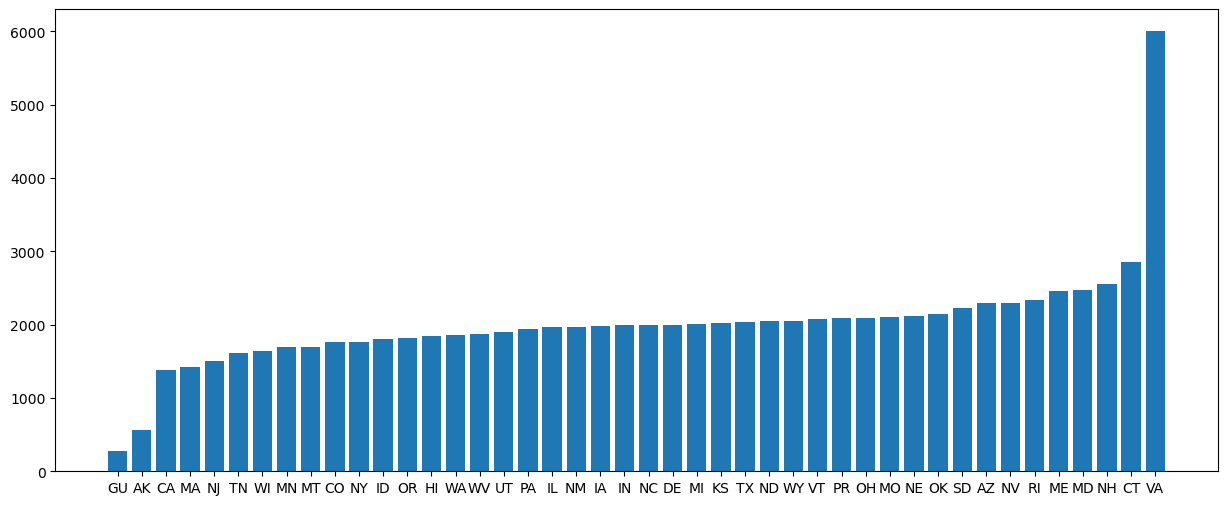

In [43]:
plt.figure(figsize=(15,6))

plt.bar(groupedStateData_sorted["Site.State"], groupedStateData_sorted["Turbine.Capacity"] )

From the above graph, it appears that the states generally hover around the same values. VA is a high outlier, while GU and AK would be considered abnormally low outliers. 